# Module 2a: Pixel Neighbors

****

So far we have looked at pixels in isolation.  More advanced image processing techniques need to take into account the neighboring pixel values.  Remember the 3D pixel array in Module 1, we have been manipulating pixel values in the 3rd dimension where the RGB color values of each individual pixel are located.  We need to search in the 1st and 2nd dimensions to move beyond the ono-to-one pixel processing. 

**3D Array**&nbsp;&nbsp;[ [ [ ] ] ] <br>

|| **0** | **1** | **2** |
| :-: | :-: | :-: | :-: |
| **0** |  55,100,200  |  74,124,100  | 89,210,10  |
| **1** |  124,74,191  |  174,43,34  |  201,142,60  |
| **2** |  191,50,10  |  215,111,84  |  245,139,81  |


[1st Dimension][2nd Dimension][3rd Dimension]

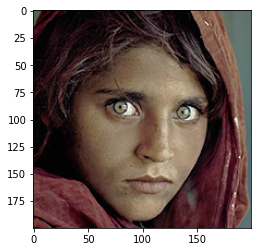

In [2]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('../Graphics/face.png')

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)

### Detecting features

As we move close to the computer vision section of this course, algorithms that detect features within an image become powerful tools.  What is a image feature?  Lines (horizontal, vertical, diagonal), circles, edges, color combinations, and any other pattern you can think off.  All images are a collections of these low level features.  Let's build a filter to detect vertical edges in our image. 

<bold>Here is the sudo code of our vertical edge detector:</bold><p>
Input:<br>
Source RGB image.<br>
Destination empty RGB image.<p>
<ol>
<li>For each row in the source image:</li>
<li>For each pixel in the row:</li>
<li>Subtract the current pixel's RGB values with the pixel to the left. </li>
<li>Take the absolute value of this difference.</li>
<li>Set the destination pixel to this value.</li>
</ol>

This sudo code describes a very simple edge detection algorithm.  If pixel values differ greatly from their neighbors they are most likely a part of an edge.  If many pixels in a sequence have this large difference they will form an edge.   

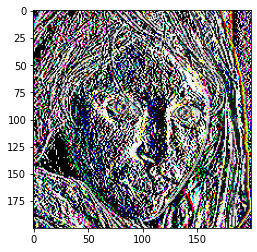

In [3]:
# Save the height, width, and channel depth.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

# Create a blank array for our destination image.
imgEdge = np.zeros((h,w,d), dtype=np.uint8)

# For each row in our image
for y in range(0,h):
    # For each pixel in our image
    for x in range(1,w):
        # For each RGB value.
        for z in range(0,d):
            curPixel = img[y,x,z]
            leftPixel = img[y,x-1,z]
            imgEdge[y,x,z] = np.abs(np.subtract(curPixel,leftPixel))
                                    
plt.imshow(imgEdge)

###  Results

+  You can make out the edges of the face but we are dealing with a lot of color noise.  Image noise is random variation of brightness or color information in images. <br>
+  Let's convert the image to greyscale to help out our edge detecting algorithm. 

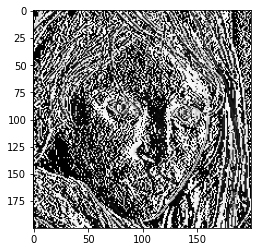

In [5]:
imgEdge = np.zeros((h,w,d), dtype=np.uint8)

imgGrey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# For each row in our image
for y in range(0,h):
    # For each pixel in our image
    for x in range(1,w):
        curPixel = imgGrey[y,x]
        leftPixel = imgGrey[y,x-1]
        imgEdge[y,x] = np.abs(np.subtract(curPixel,leftPixel))
                                    
plt.imshow(imgEdge, cmap="gray")

### Results

+ The conversion to black and white removed the color noise and made the edges more evident but we still have a noisy image.  

### Next Steps
+ A simple approach to removing noise is blurring or smoothing the image.  How this work?  The blur filter reduces the difference between neighboring pixels.  Small pixel differences will be eliminated leaving only the larger ones. 


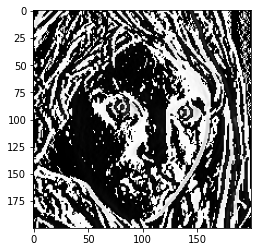

In [7]:
imgEdge = np.zeros((h,w,d), dtype=np.uint8)

#imgGrey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

kernel = np.array(([.111,.111,.111],[.111,.111,.111],[.111,.111,.111]), dtype=np.float32)

imgGrey = cv2.filter2D(imgGrey,-1,kernel)

# For each row in our image
for y in range(0,h):
    # For each pixel in our image
    for x in range(1,w):
        curPixel = imgGrey[y,x]
        leftPixel = imgGrey[y,x-1]
        imgEdge[y,x] = np.abs(np.subtract(curPixel,leftPixel))
                                    
plt.imshow(imgEdge, cmap="gray")

### The Canny Edge Dectoctor 

[Open CV Canny Edge](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

The Canny operator first smoothes or blurs the image and then contour segments the image by following the intensity differences of neighboring pixels.  

Sobel Filtering - Edge Detection

[Sobel Operator](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

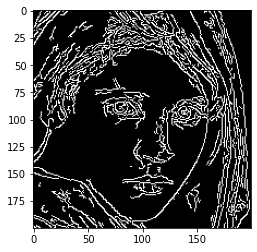

In [9]:
edges = cv2.Canny(img, 100,200)

plt.imshow(edges, cmap="gray")